# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train, y_test))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### Sample Traffic Sign Images

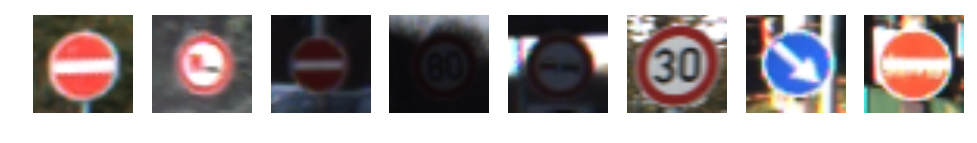

In [4]:
# Plot sample traffic sign images
n_samples = 8
images = X_train[np.random.randint(0, n_train, n_samples)]
fig, axs = plt.subplots(1, n_samples)
fig.set_size_inches(12, 4)
for i,image in enumerate(images):
    axs[i].axis('off')
    axs[i].imshow(image)

### Class distribution of Train/Test

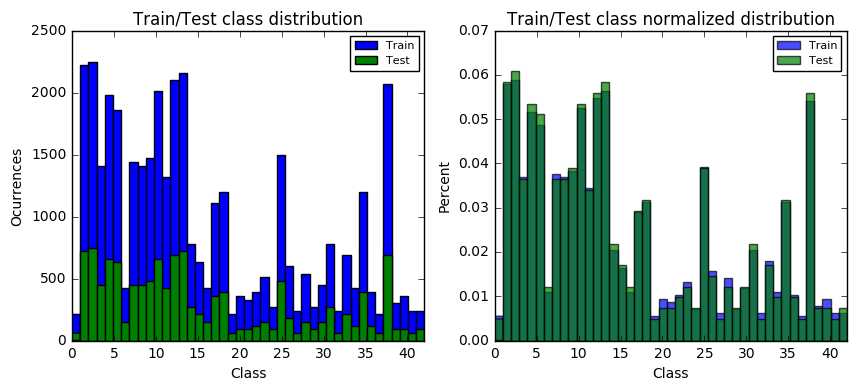

In [5]:
def plot_class_distribution(y1, y2, y1_label='Train', y2_label='Test'):
    plt.figure(figsize=(10,4))
    # Train/test class distribution
    plt.subplot(121)
    plt.hist(y1, bins=n_classes, label=y1_label)
    plt.hist(y2, bins=n_classes, label=y2_label)
    plt.xlabel('Class')
    plt.ylabel('Ocurrences')
    plt.title('%s/%s class distribution' % (y1_label, y2_label))
    plt.xlim((0, n_classes-1))
    plt.legend(prop={'size':8})

    # Train/test class normalized distribution
    plt.subplot(122)
    plt.hist(y1, bins=n_classes, label=y1_label, normed=True, alpha=0.7)
    plt.hist(y2, bins=n_classes, label=y2_label, normed=True, alpha=0.7)
    plt.xlabel('Class')
    plt.ylabel('Percent')
    plt.title('%s/%s class normalized distribution' % (y1_label, y2_label))
    plt.xlim((0, n_classes-1))
    plt.legend(prop={'size':8})
    plt.show()

plot_class_distribution(y_train, y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

# convert from RGB to YUV
yuv_train = np.array([cv2.cvtColor(X_train[i], cv2.COLOR_BGR2YUV) for i in range(X_train.shape[0])])
yuv_test = np.array([cv2.cvtColor(X_test[i], cv2.COLOR_BGR2YUV) for i in range(X_test.shape[0])])
# convert from 0,255 to -1, 1
X_train_processed = (yuv_train.astype(float)-128)/128.0
X_test_processed = (yuv_test.astype(float)-128)/128.0

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

- Convert from RGB to YUV
- Convert features from (0, 255) to (-1, 1).

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

# split train data using 80% for training and 20% for validation
x_train_processed_split, x_validation, y_train_split, y_validation = train_test_split(X_train_processed, y_train, test_size=0.2)
train_labels = y_train_split
validation_labels = y_validation
print("Train shape: ", x_train_processed_split.shape, train_labels.shape)
print("Validation size: ", x_validation.shape, validation_labels.shape)

# keep all test data for final evaluation
x_test = X_test_processed
test_labels = y_test
print("Test shape: ", x_test.shape, test_labels.shape)

Train shape:  (31367, 32, 32, 3) (31367,)
Validation size:  (7842, 32, 32, 3) (7842,)
Test shape:  (12630, 32, 32, 3) (12630,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

- Split train data and use 20% for validation

In [57]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def conv2d(x, W, b, strides=1, padding='VALID'):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')


tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) # features consists of 32x32x3 images
y = tf.placeholder(tf.int32, (None)) # Classify over 43 classes
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

mu = 0
sigma = 0.1

layer_width = {
    'conv_1': 16,
    'conv_2': 64,
    'fc_3': 512,
    'out': n_classes
}
weights = {
    'conv_1': tf.Variable(tf.truncated_normal([5, 5, 3, layer_width['conv_1']], mean = mu, stddev = sigma)),
    'conv_2': tf.Variable(tf.truncated_normal([5, 5, layer_width['conv_1'], layer_width['conv_2']], mean = mu, stddev = sigma)),
    'fc_3': tf.Variable(tf.truncated_normal([5*5*layer_width['conv_2'], layer_width['fc_3']], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([layer_width['fc_3'], layer_width['out']], mean = mu, stddev = sigma))
}
biases = {
    'conv_1': tf.Variable(tf.zeros(layer_width['conv_1'])),
    'conv_2': tf.Variable(tf.zeros(layer_width['conv_2'])),
    'fc_3': tf.Variable(tf.zeros(layer_width['fc_3'])),
    'out': tf.Variable(tf.zeros(layer_width['out']))
}
conv1 = conv2d(x, weights['conv_1'], biases['conv_1'])
print("Shape of conv1: ", conv1.get_shape().as_list())
conv1 = maxpool2d(conv1)
print("Shape of conv1 after pooling: ", conv1.get_shape().as_list())
conv1 = tf.nn.dropout(conv1, keep_prob)

conv2 = conv2d(conv1, weights['conv_2'], biases['conv_2'])
print("Shape of conv2: ", conv2.get_shape().as_list())
conv2 = maxpool2d(conv2)
print("Shape of conv2 after pooling: ", conv2.get_shape().as_list())
conv2 = tf.nn.dropout(conv2, keep_prob)


fc3 = tf.contrib.layers.flatten(conv2)
print("Shape of fc3: ", fc3.get_shape().as_list())
fc3 = tf.add(tf.matmul(fc3, weights['fc_3']), biases['fc_3'])
fc3 = tf.nn.relu(fc3)
fc3 = tf.nn.dropout(fc3, keep_prob)

# Return the result of the last fully connected layer.
out = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
print("Output shape: ", out.get_shape().as_list())

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(out, one_hot_y))
beta = 0.001
loss_l2 = tf.add(loss_op, tf.add_n([tf.nn.l2_loss(v) for _,v in weights.items()])*beta)

opt = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = opt.minimize(loss_l2)
prediction = tf.argmax(out, 1)
correct_prediction = tf.equal(prediction, tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Shape of conv1:  [None, 28, 28, 16]
Shape of conv1 after pooling:  [None, 14, 14, 16]
Shape of conv2:  [None, 10, 10, 64]
Shape of conv2 after pooling:  [None, 5, 5, 64]
Shape of fc3:  [None, 1600]
Shape of fc4:  [None, 512]
Output shape:  [None, 43]


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

- Conv(15x15x16) -> FC(3600) -> FC(43)
- Dropout with probability of 0.5 after each layer (except the output layer)
- Loss function with regularization
- Adam optimizer

In [58]:
### model evaluation
from tqdm import tqdm_notebook
import math

def next_batch(x, y, step, batch_size):
    start = step*batch_size
    return x[start:start+batch_size, ...], y[start:start+batch_size, ...]

def eval_data(features, labels):
    """
    Returns the loss and accuracy given features and labels as inputs.
    """
    num_examples = features.shape[0]
    steps_per_epoch = math.ceil(num_examples / BATCH_SIZE)
    total_acc, total_loss = 0, 0
    sess = tf.get_default_session()
    y_pred = np.array([])
    for step in range(steps_per_epoch):
        batch_x, batch_y = next_batch(features, labels, step, BATCH_SIZE)
        loss, acc, batch_pred = sess.run([loss_op, accuracy_op, prediction], feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
        y_pred = np.append(y_pred, batch_pred)
    return total_loss/num_examples, total_acc/num_examples, y_pred

In [59]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 50
BATCH_SIZE = 300

saver = tf.train.Saver()
train_results, validation_results = [], []

with tf.Session() as sess:
    try:
        sess.run(tf.global_variables_initializer())
        num_examples = x_train_processed_split.shape[0]
        steps_per_epoch = math.ceil(num_examples / BATCH_SIZE)

        # Train model
        for i in tqdm_notebook(range(EPOCHS)):
            for step in tqdm_notebook(range(steps_per_epoch), leave=False):
                batch_x, batch_y = next_batch(x_train_processed_split, train_labels, step, BATCH_SIZE)
                loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            train_loss, train_acc, _ = eval_data(x_train_processed_split, train_labels)
            train_results.append([train_loss, train_acc])
            val_loss, val_acc, _ = eval_data(x_validation, validation_labels)
            validation_results.append([val_loss, val_acc])
            print("[EPOCH %d] Train/Validation loss = %.3f / %.3f, accuracy = %.3f / %.3f" % (i+1, train_loss, val_loss, train_acc, val_acc))

    except KeyboardInterrupt:
        print("stopped")
    finally:
        saver.save(sess, './models/model.ckpt')

[EPOCH 1] Train/Validation loss = 3.644 / 3.645, accuracy = 0.105 / 0.111
[EPOCH 2] Train/Validation loss = 3.071 / 3.073, accuracy = 0.335 / 0.336
[EPOCH 3] Train/Validation loss = 1.871 / 1.871, accuracy = 0.507 / 0.499
[EPOCH 4] Train/Validation loss = 1.211 / 1.218, accuracy = 0.667 / 0.665
[EPOCH 5] Train/Validation loss = 0.815 / 0.824, accuracy = 0.810 / 0.808
[EPOCH 6] Train/Validation loss = 0.548 / 0.562, accuracy = 0.885 / 0.875
[EPOCH 7] Train/Validation loss = 0.403 / 0.417, accuracy = 0.924 / 0.916
[EPOCH 8] Train/Validation loss = 0.299 / 0.319, accuracy = 0.938 / 0.929
[EPOCH 9] Train/Validation loss = 0.238 / 0.259, accuracy = 0.952 / 0.943
[EPOCH 10] Train/Validation loss = 0.194 / 0.217, accuracy = 0.958 / 0.949
[EPOCH 11] Train/Validation loss = 0.167 / 0.187, accuracy = 0.964 / 0.957
[EPOCH 12] Train/Validation loss = 0.141 / 0.162, accuracy = 0.976 / 0.967
[EPOCH 13] Train/Validation loss = 0.126 / 0.146, accuracy = 0.975 / 0.968
[EPOCH 14] Train/Validation loss =

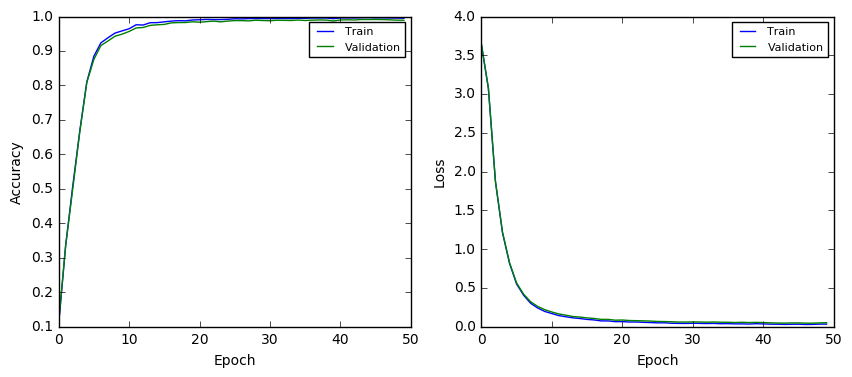

Test loss = 0.151
Test accuracy = 0.957


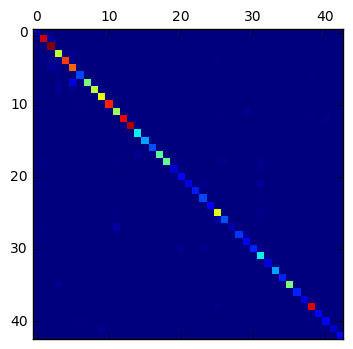

In [60]:
from sklearn.metrics import confusion_matrix

# plot train/validation accuracy along epochs
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(np.array(train_results)[:,1], label="Train")
plt.plot(np.array(validation_results)[:,1], label="Validation")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(prop={'size':8}, loc='best')

plt.subplot(122)
plt.plot(np.array(train_results)[:,0], label="Train")
plt.plot(np.array(validation_results)[:,0], label="Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(prop={'size':8}, loc='best')
plt.show()

# Evaluate on the test data
with tf.Session() as sess:
    saver.restore(sess, './models/model.ckpt')
    test_loss, test_acc, test_predictions = eval_data(x_test, test_labels)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))
    plt.matshow(confusion_matrix(test_labels, test_predictions))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.